# [TEMPLATE] DATASET DEPURADO

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
bins = 200
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="darkgrid") # seteando tipo de grid en seaborn
sns.set(color_codes=True)

In [6]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [7]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

# ¿Existe alguna relación entre la latitud de la propiedad y el precio, quizás por cercanía a la frontera con Estados Unidos o por la temperatura?

## Todas las propiedades

In [8]:
datos = df.loc[~(df['lat'].isnull()) & (df['lat'] > 0)]

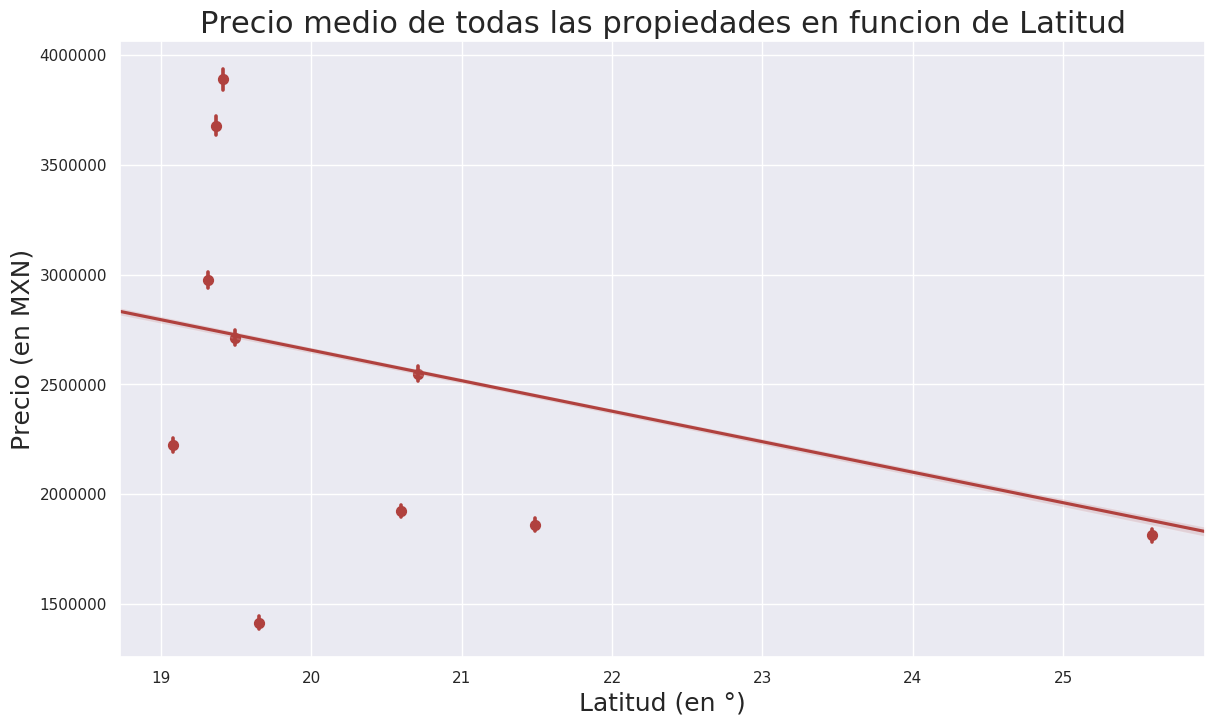

In [10]:
plt.figure(figsize=(14, 8))
g = sns.regplot(x="lat", y="precio", data=datos, color='#B0413E',x_bins=10, x_estimator=np.mean)
g.set_title("Precio medio de todas las propiedades en funcion de Latitud", fontsize=22)
g.set_xlabel("Latitud (en °)",fontsize=18)
g.set_ylabel("Precio (en MXN)", fontsize=18)
g.figure.savefig("precio segun latitud(todas las propiedades).png")

## Casas

In [12]:
datos_casas = datos.loc[df['tipodepropiedad']=='Casa']

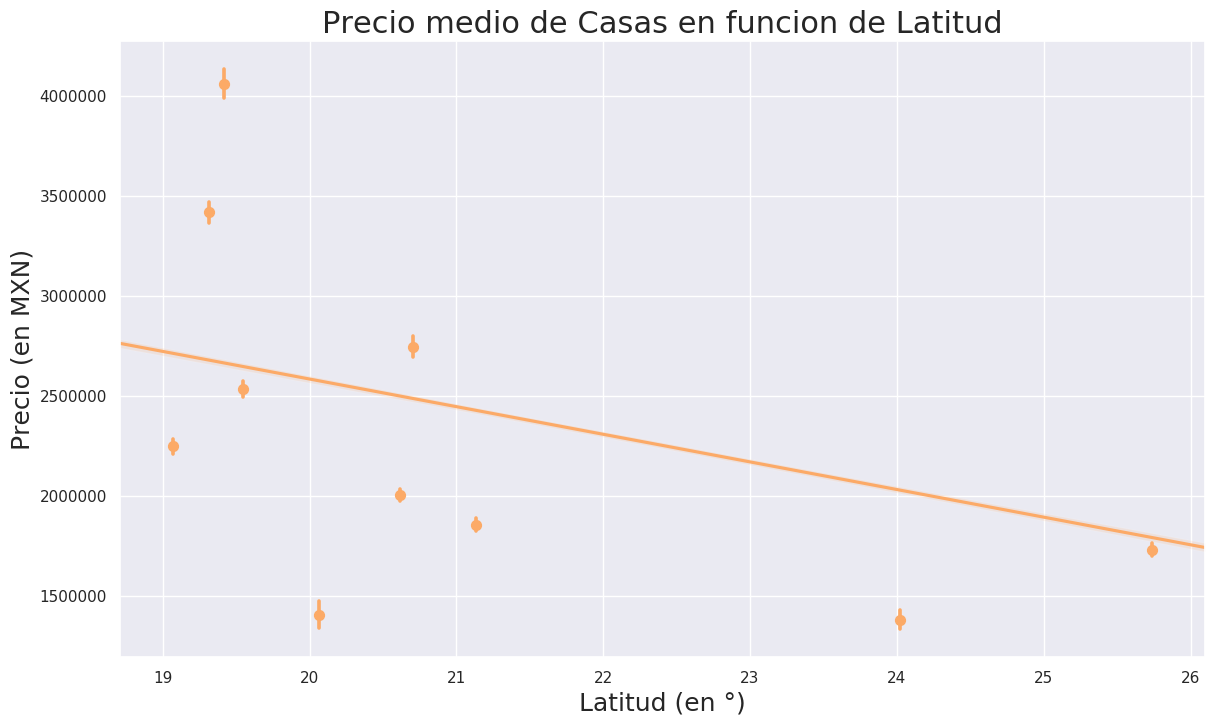

In [13]:
plt.figure(figsize=(14, 8))
g = sns.regplot(x="lat", y="precio", data=datos_casas, color='#FCAA67',x_bins=10, x_estimator=np.mean)
g.set_title("Precio medio de Casas en funcion de Latitud", fontsize=22)
g.set_xlabel("Latitud (en °)",fontsize=18)
g.set_ylabel("Precio (en MXN)", fontsize=18)
g.figure.savefig("precio segun latitud(casas).png")

In [8]:
datos['tipodepropiedad'].value_counts()

Casa                             65322
Apartamento                      29955
Casa en condominio                9707
Terreno                           4882
Local Comercial                   1632
Oficina comercial                  928
Edificio                           800
Bodega comercial                   693
Terreno comercial                  666
Casa uso de suelo                  412
Quinta Vacacional                  188
Duplex                             169
Villa                              139
Inmuebles productivos urbanos      125
Otros                              105
Local en centro comercial           85
Rancho                              75
Departamento Compartido             66
Nave industrial                     46
Terreno industrial                  26
Huerta                               4
Lote                                 1
Hospedaje                            0
Garage                               0
Name: tipodepropiedad, dtype: int64

## Apartamentos

In [14]:
datos_apartamento = datos.loc[df['tipodepropiedad']=='Apartamento']

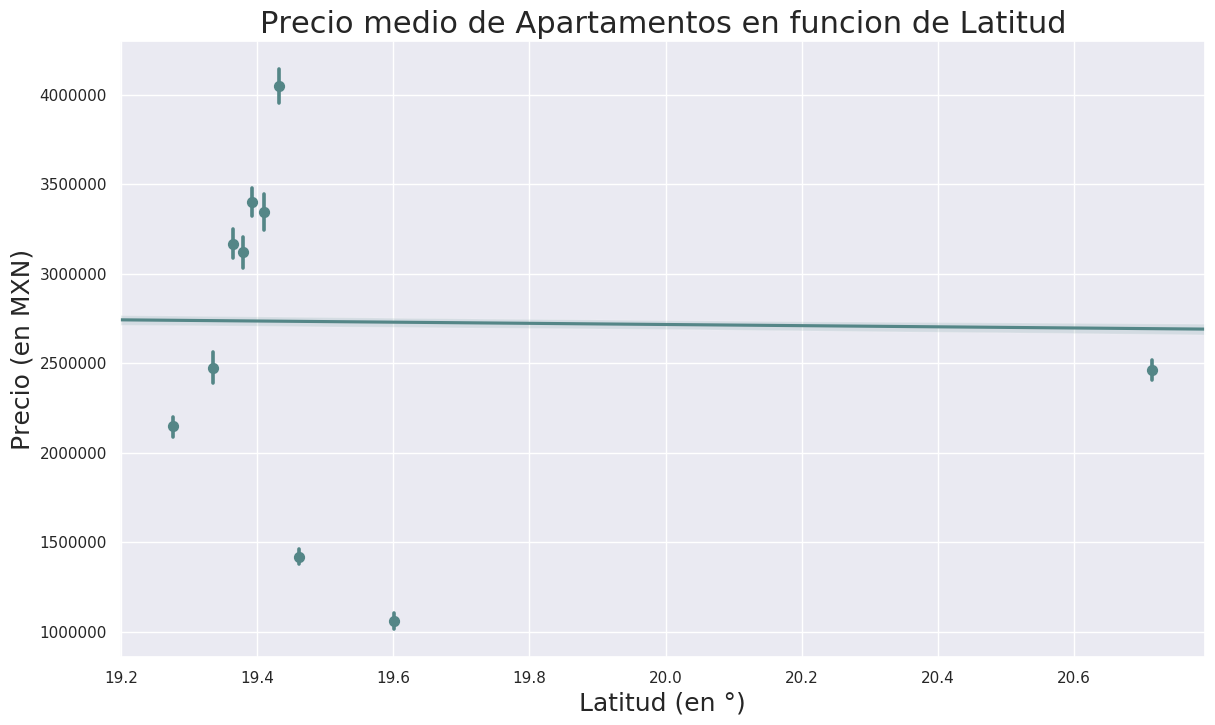

In [15]:
plt.figure(figsize=(14, 8))
g = sns.regplot(x="lat", y="precio", data=datos_apartamento, color='#548687',x_bins=10, x_estimator=np.mean)
g.set_title("Precio medio de Apartamentos en funcion de Latitud", fontsize=22)
g.set_xlabel("Latitud (en °)",fontsize=18)
g.set_ylabel("Precio (en MXN)", fontsize=18)
g.figure.savefig("precio segun latitud(apartamentos).png")